# COMP4331 Assignment 1

## Preparing the dataset

In [100]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn

In [101]:
# load "forestfires.csv" into a pandas dataframe
df = pd.read_csv("forestfires.csv", sep = ',')

In [102]:
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


## Task 1. Basic Summary

The mean, standard deviation, mode, median, and five-number summary of the `RH` attribute is reported.

In [103]:
print("RH mean: ", df['RH'].mean())
print("RH standard deviation: ", df['RH'].std())
print("RH mode: ", df['RH'].mode())
print("RH median: ", df['RH'].median())
print("RH five-number summary: ", df['RH'].describe())

RH mean:  44.28820116054158
RH standard deviation:  16.317469239378394
RH mode:  0    27
Name: RH, dtype: int64
RH median:  42.0
RH five-number summary:  count    517.000000
mean      44.288201
std       16.317469
min       15.000000
25%       33.000000
50%       42.000000
75%       53.000000
max      100.000000
Name: RH, dtype: float64


The mean, standard deviation, mode, median, and five-number summary of the `wind` attribute is reported.

In [104]:
print("wind mean: ", df['wind'].mean())
print("wind standard deviation: ", df['wind'].std())
print("wind mode: ", df['wind'].mode())
print("wind median: ", df['wind'].median())
print("wind five-number summary: ", df['wind'].describe())

wind mean:  4.017601547388782
wind standard deviation:  1.7916526009464604
wind mode:  0    2.2
1    3.1
Name: wind, dtype: float64
wind median:  4.0
wind five-number summary:  count    517.000000
mean       4.017602
std        1.791653
min        0.400000
25%        2.700000
50%        4.000000
75%        4.900000
max        9.400000
Name: wind, dtype: float64


## Task 2. Box Plot

### Part A: Boxplot for `RH` attribute

{'whiskers': [<matplotlib.lines.Line2D at 0x1ac85a96350>,
 'caps': [<matplotlib.lines.Line2D at 0x1ac85a968f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ac85a96080>],
 'medians': [<matplotlib.lines.Line2D at 0x1ac85a96e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ac85a97160>],
 'means': []}

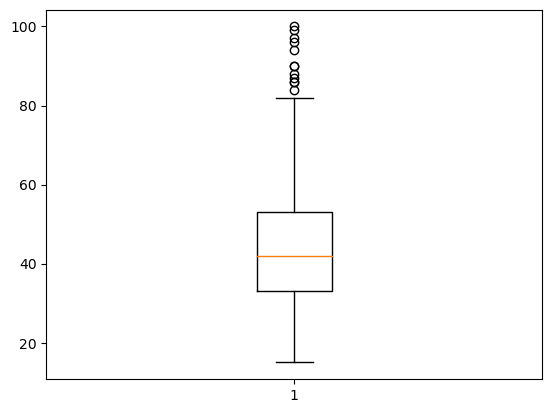

In [105]:
# generate boxplot for `RH` attribute with matplotlib
plt.boxplot(df['RH'])

### Part B: Boxplot for `RH` attribute for various values of month

{'whiskers': [<matplotlib.lines.Line2D at 0x1ac85afa1a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ac85afa620>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ac85af9ed0>,
 'medians': [<matplotlib.lines.Line2D at 0x1ac85afabc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ac85afae90>,
 'means': []}

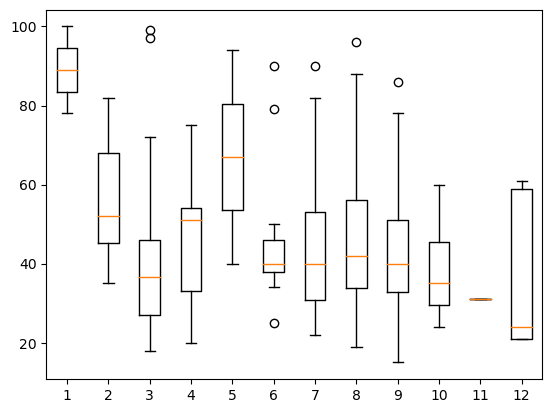

In [106]:
# generate boxplot for `RH` attribute with matplotlib for various values of months
plt.boxplot([df['RH'][df['month'] == 'jan'], df['RH'][df['month'] == 'feb'], df['RH'][df['month'] == 'mar'], df['RH'][df['month'] == 'apr'], df['RH'][df['month'] == 'may'], df['RH'][df['month'] == 'jun'], df['RH'][df['month'] == 'jul'], df['RH'][df['month'] == 'aug'], df['RH'][df['month'] == 'sep'], df['RH'][df['month'] == 'oct'], df['RH'][df['month'] == 'nov'], df['RH'][df['month'] == 'dec']])

### Part C: Boxplot for `RH` attribute with various values of day

{'whiskers': [<matplotlib.lines.Line2D at 0x1ac85c49b70>,
 'caps': [<matplotlib.lines.Line2D at 0x1ac85c4a110>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ac85c498a0>,
 'medians': [<matplotlib.lines.Line2D at 0x1ac85c4a6b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ac85c4a980>,
 'means': []}

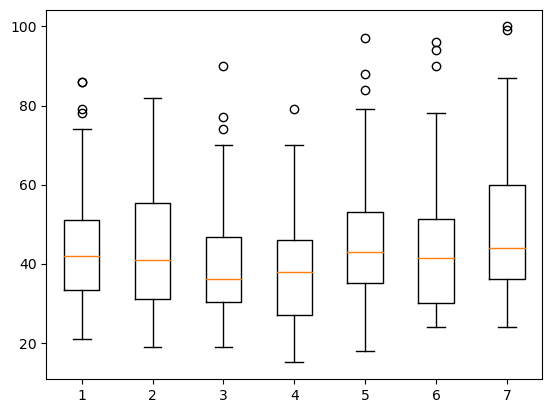

In [107]:
# generate boxplot for `RH` attribute with various values of day
plt.boxplot([df['RH'][df['day'] == 'mon'], df['RH'][df['day'] == 'tue'], df['RH'][df['day'] == 'wed'], df['RH'][df['day'] == 'thu'], df['RH'][df['day'] == 'fri'], df['RH'][df['day'] == 'sat'], df['RH'][df['day'] == 'sun']])

## Task 3. Hist Plot

(array([ 21.,  96., 130., 104.,  63.,  40.,  31.,  20.,   7.,   5.]),
 array([ 15. ,  23.5,  32. ,  40.5,  49. ,  57.5,  66. ,  74.5,  83. ,
         91.5, 100. ]),
 <BarContainer object of 10 artists>)

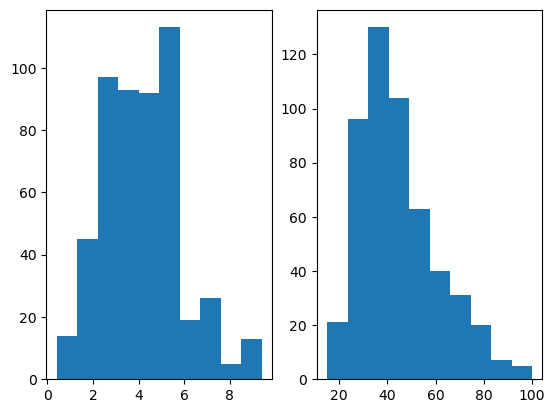

In [108]:
# generate histogram for attributes `wind` and `RH` with matplotlib in separate subplots
plt.subplot(1, 2, 1)
plt.hist(df['wind'])
plt.subplot(1, 2, 2)
plt.hist(df['RH'])

## Task 4. Scatter Plot

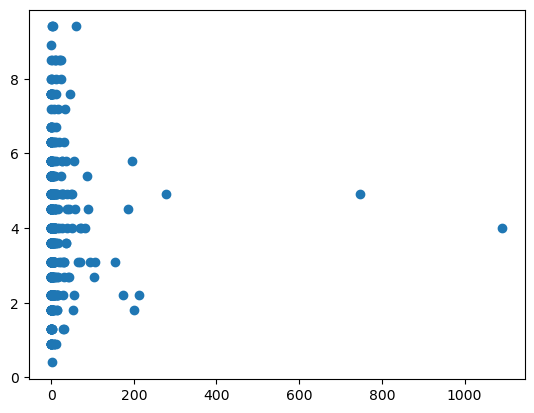

In [109]:
# generate scatter plot for `wind` and `area` attributes, where `area` is the x-axis in matplotlib
plt.scatter(df['area'], df['wind'])

In [110]:
# calculate the correlation coefficient between the `wind` and `area` attribute
print("Correlation coefficient:", df['wind'].corr(df['area']))

Correlation coefficient: 0.012317276888673111


## Task 5. Correlation

In [111]:
# find the correlation coefficients between the attributes `FFMC`, `DMC`, `DC`, `ISI`, `RH` and `wind` with `area`
coefficients = {}
for attribute in ['FFMC', 'DMC', 'DC', 'ISI', 'RH', 'wind']:
    coefficients[attribute] = df[attribute].corr(df['area'])
print("Correlation coefficients:", coefficients)

# find the magnitude of the correlation coefficients and sort them by decreasing order
sorted_coefficients = sorted(coefficients.items(), key = lambda x: abs(x[1]), reverse = True)

# print the top three elements of the sorted array
print("Top three correlation coefficients:", sorted_coefficients[:3])

Correlation coefficients: {'FFMC': 0.04012200415862081, 'DMC': 0.07299429625105726, 'DC': 0.04938322529891625, 'ISI': 0.008257687841226793, 'RH': -0.07551856346988917, 'wind': 0.012317276888673111}
Top three correlation coefficients: [('RH', -0.07551856346988917), ('DMC', 0.07299429625105726), ('DC', 0.04938322529891625)]


## Task 6. $\chi^2$-Test

In [112]:
significance_level = 0.01

### Part A: Dependency between `temp` and `wind` attributes

In [113]:
# perform chi square test for independence between `temp` and `wind` attributes
contingency_table = pd.crosstab(df['temp'], df['wind'])
chi2, p, dof, expected = scipy.stats.chi2_contingency(contingency_table)
print("Chi square test for independence between `temp` and `wind` attributes:")
print("Chi square statistic:", chi2)
print("p-value:", p)

# are the `temp` and `wind` attributes independent of each other?
if p < significance_level:
    print("The `temp` and `wind` attributes are dependent of each other.")
else:
    print("The `temp` and `wind` attributes are independent of each other.")


Chi square test for independence between `temp` and `wind` attributes:
Chi square statistic: 4252.987444941122
p-value: 8.525582794455281e-07
The `temp` and `wind` attributes are dependent of each other.


### Part B: Dependency between `X` and `Y` attributes

In [114]:
# perform chi square test for independence between `X` and `Y` attributes
contingency_table = pd.crosstab(df['X'], df['Y'])
chi2, p, dof, expected = scipy.stats.chi2_contingency(contingency_table)
print("Chi square test for independence between `X` and `Y` attributes:")
print("Chi square statistic:", chi2)
print("p-value:", p)

# are the `X` and `Y` attributes independent of each other?
if p < significance_level:
    print("The `X` and `Y` attributes are dependent of each other.")
else:
    print("The `X` and `Y` attributes are independent of each other.")

Chi square test for independence between `X` and `Y` attributes:
Chi square statistic: 840.8944600618115
p-value: 2.287321236581469e-145
The `X` and `Y` attributes are dependent of each other.


## Task 7. Normalization

### Part A: Normalize attribute `FFMC`

In [115]:
# original dataframe
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [116]:
# normalize attribute `FFMC` between 0 and 1 with min-max normalization using the built-in function from scikit-learn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['FFMC'] = scaler.fit_transform(df['FFMC'].values.reshape(-1, 1))


In [117]:
# dataframe after normalization of `FFMC` attribute
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,0.870968,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,0.927742,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,0.927742,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,0.941935,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,0.910968,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,0.949677,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,0.949677,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,0.939355,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,0.932903,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,0.952258,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


### Part B: Normalize attributes `DC`, `ISI`, `temp`, `RH`, and `wind`

In [118]:
# normalize attributes `DC`, `ISI`, `temp`, `RH`, and `wind` to mean zero and standard deviation one using z-score normalization using the built-in function from scikit-learn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['DC'] = scaler.fit_transform(df['DC'].values.reshape(-1, 1))
df['ISI'] = scaler.fit_transform(df['ISI'].values.reshape(-1, 1))
df['temp'] = scaler.fit_transform(df['temp'].values.reshape(-1, 1))
df['RH'] = scaler.fit_transform(df['RH'].values.reshape(-1, 1))
df['wind'] = scaler.fit_transform(df['wind'].values.reshape(-1, 1))

In [119]:
# dataframe after normalization of `DC`, `ISI`, `temp`, `RH`, and `wind` attributes
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,0.870968,26.2,-1.830477,-0.860946,-1.842640,0.411724,1.498614,0.0,0.0
1,7,4,oct,tue,0.927742,35.4,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,0.0,0.0
2,7,4,oct,sat,0.927742,43.7,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,0.0,0.0
3,8,6,mar,fri,0.941935,33.3,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.2,0.0
4,8,6,mar,sun,0.910968,51.3,-1.798600,0.126966,-1.291012,3.356206,-1.238940,0.0,0.0
5,8,6,aug,sun,0.949677,85.3,-0.241863,1.246598,0.570734,-0.937830,0.772325,0.0,0.0
6,8,6,aug,mon,0.949677,88.9,-0.211197,-0.114524,0.898263,-1.060516,-0.512650,0.0,0.0
7,8,6,aug,mon,0.939355,145.4,0.243154,0.368455,-1.877117,2.558742,-1.015466,0.0,0.0
8,8,6,sep,tue,0.932903,129.5,0.583715,-0.443828,-0.997959,1.147845,0.772325,0.0,0.0
9,7,5,sep,sat,0.952258,88.0,0.607926,-0.421874,0.674164,-0.263053,-0.009834,0.0,0.0


### Part C: Export to CSV file

In [120]:
# output dataframe to CSV file named "data_normalized.csv"
df.to_csv("data_normalized.csv", index = False)

## Task 8. PCA

In [121]:
# only the attributes `DC`, `ISI`, `temp`, `RH`, and `wind` are used
pca_df = df[['DC', 'ISI', 'temp', 'RH', 'wind']]
pca_df.head(10)

,DC,ISI,temp,RH,wind
0,-1.830477,-0.860946,-1.842640,0.411724,1.498614
1,0.488891,-0.509688,-0.153278,-0.692456,-1.741756
2,0.560715,-0.509688,-0.739383,-0.692456,-1.518282
3,-1.898266,-0.004756,-1.825402,3.233519,-0.009834
4,-1.798600,0.126966,-1.291012,3.356206,-1.238940
5,-0.241863,1.246598,0.570734,-0.937830,0.772325
6,-0.211197,-0.114524,0.898263,-1.060516,-0.512650
7,0.243154,0.368455,-1.877117,2.558742,-1.015466
8,0.583715,-0.443828,-0.997959,1.147845,0.772325
9,0.607926,-0.421874,0.674164,-0.263053,-0.009834


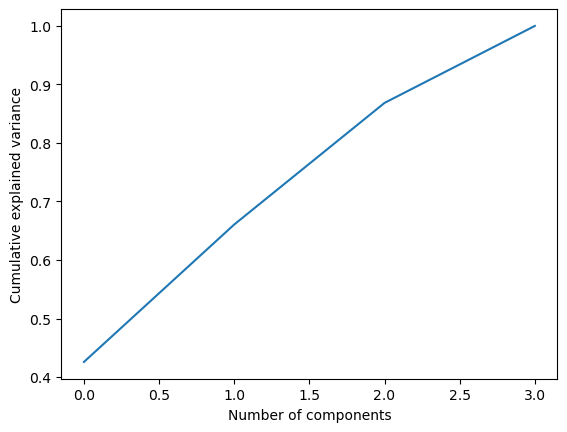

In [128]:
# plot the cumulative explained variance ratio with the number of principal components
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(pca_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');


In [130]:
pca.explained_variance_ratio_

array([0.42579912, 0.23487047, 0.2077909 , 0.13153951])

In [127]:
pca_df

array([[ 2.8707736 ,  1.03818095, -0.7376921 , -0.14817976],
       [-0.61154381, -1.67368952, -0.50651348,  0.29561033],
       [-0.21779758, -1.52025609, -0.39796623,  0.19105366],
       ...,
       [ 1.12143505,  0.01778857,  0.94673927, -1.87987336],
       [-1.1215933 ,  0.24343415,  0.10343671,  0.0450668 ],
       [ 1.99853102, -0.24129206, -2.0624634 , -0.27181027]])

## Task 9. Missing Values

The dataset is reloaded.

In [122]:
# reload the dataset
df = pd.read_csv("forestfires.csv", sep = ',')